# Proyek Analisis Data: Bike Sharing Dataset

Nama: Azam Azri Ahmad

Email: a179ybf088@devacademy.id

ID Dicoding: a179ybf088

## Menentukan Pertanyaan Bisnis
1. Bagaimana pola peminjaman sepeda berdasarkan musim dan hari kerja/libur?
2. Apa pengaruh cuaca terhadap jumlah peminjaman sepeda?
3. Bagaimana tren jumlah peminjaman sepeda setiap bulan selama tahun 2011 dan 2012?
4. Apakah terdapat perbedaan jumlah peminjaman antara pengguna casual dan registered?
5. Bagaimana segmentasi pengguna berdasarkan frekuensi dan volume peminjaman ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

## Data Wrangling
### Gathering Data

In [6]:
from google.colab import files
uploaded = files.upload()
day_df = pd.read_csv('bike-sharing-day.csv')
hour_df = pd.read_csv('bike-sharing-hour.csv')
day_df.head()

Saving bike-sharing-day.csv to bike-sharing-day (1).csv
Saving bike-sharing-hour.csv to bike-sharing-hour (1).csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset harian memiliki data dari 2011 hingga 2012.
- Terdapat kolom seperti cuaca, musim, jumlah pengguna casual & registered, dan total peminjaman.

### Assessing Data

In [7]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Tidak ada missing value.
- Beberapa kolom bertipe kategori yang direpresentasikan sebagai angka.

### Cleaning Data

In [8]:
# Menambahkan label kategori
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_map)


**Insight:**
- Data tidak memerlukan pembersihan besar.
- Ditambahkan kolom nama musim untuk memudahkan visualisasi.

## Exploratory Data Analysis (EDA)
### Explore ...

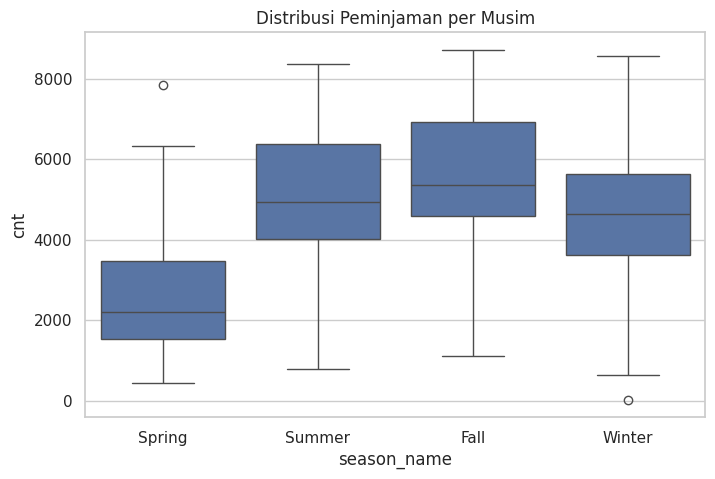

In [9]:
# Distribusi peminjaman per musim
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x='season_name', y='cnt')
plt.title('Distribusi Peminjaman per Musim')
plt.show()

**Insight:**
- Jumlah peminjaman cenderung tinggi di musim Fall dan Summer.

## Visualization & Explanatory Analysis
### Pertanyaan 1: Musim dan Hari Kerja/Libur

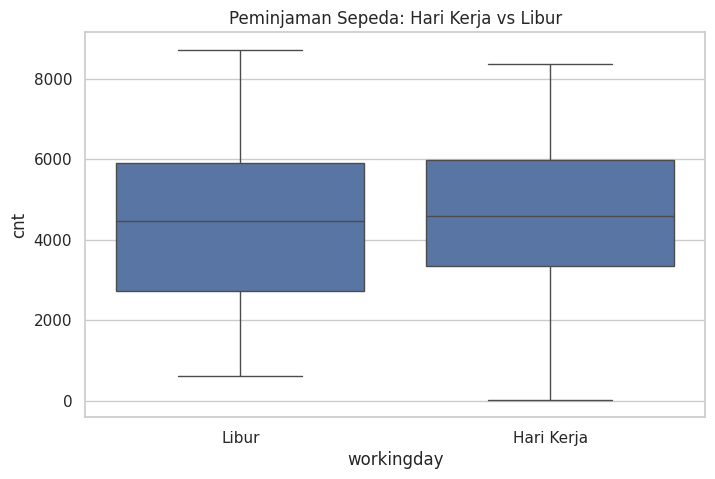

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x='workingday', y='cnt')
plt.xticks([0,1], ['Libur', 'Hari Kerja'])
plt.title('Peminjaman Sepeda: Hari Kerja vs Libur')
plt.show()

### Pertanyaan 2: Pengaruh Cuaca

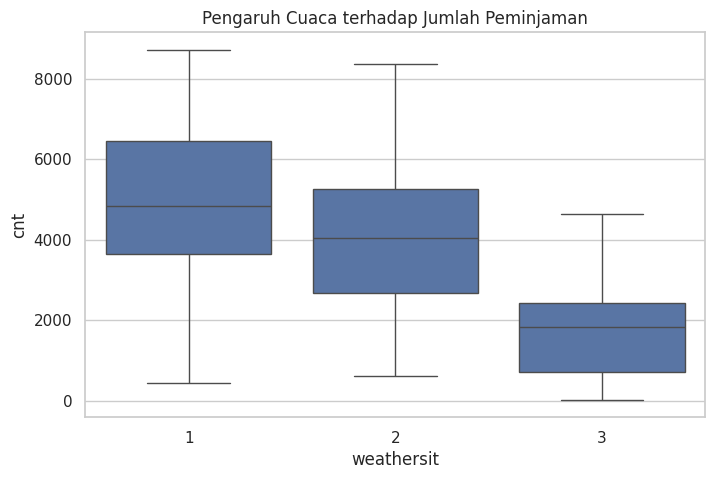

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman')
plt.show()

### Pertanyaan 3: Tren Bulanan

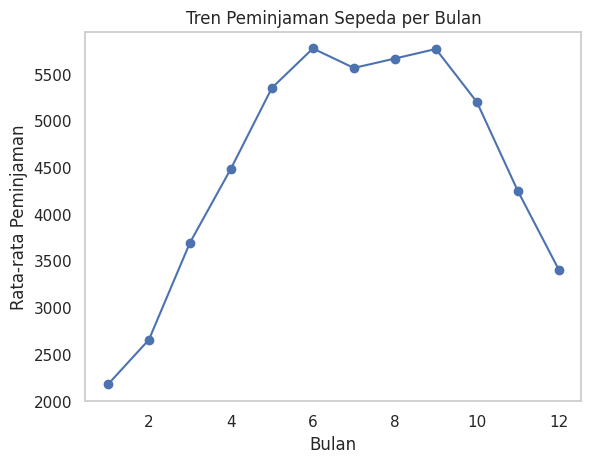

In [12]:
monthly_trend = day_df.groupby('mnth')['cnt'].mean()
monthly_trend.plot(kind='line', marker='o')
plt.title('Tren Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Peminjaman')
plt.grid()
plt.show()

### Pertanyaan 4: Casual vs Registered

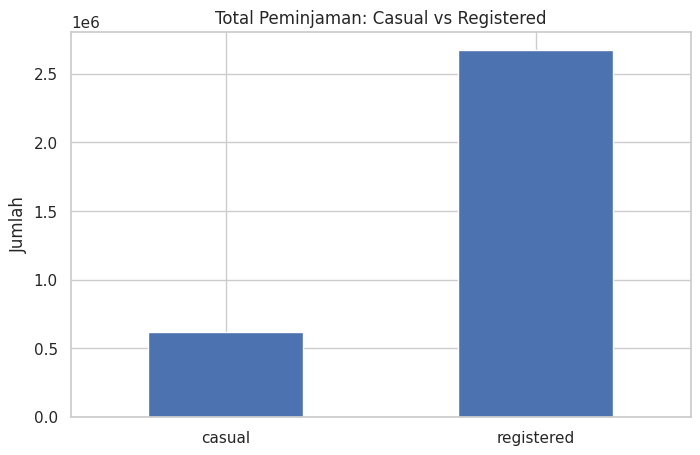

In [13]:
plt.figure(figsize=(8,5))
day_df[['casual', 'registered']].sum().plot(kind='bar')
plt.title('Total Peminjaman: Casual vs Registered')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 5: Segmentasi Pengguna (Clustering Manual)

<ipython-input-14-0ffa00b367dc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_seg, x='segment', palette='Set2')


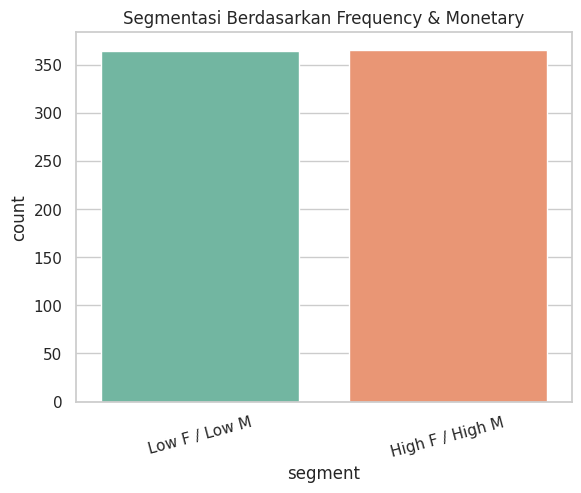

In [14]:
df_seg = day_df[['casual', 'registered', 'cnt']].copy()
df_seg['frequency'] = df_seg['casual'] + df_seg['registered']
df_seg['monetary'] = df_seg['cnt']

freq_med = df_seg['frequency'].median()
mon_med = df_seg['monetary'].median()

def seg(row):
    if row['frequency'] >= freq_med and row['monetary'] >= mon_med:
        return 'High F / High M'
    elif row['frequency'] >= freq_med:
        return 'High F / Low M'
    elif row['monetary'] >= mon_med:
        return 'Low F / High M'
    else:
        return 'Low F / Low M'

df_seg['segment'] = df_seg.apply(seg, axis=1)
sns.countplot(data=df_seg, x='segment', palette='Set2')
plt.title('Segmentasi Berdasarkan Frequency & Monetary')
plt.xticks(rotation=15)
plt.show()

**Insight:**
- Sebagian besar hari masuk ke dalam segmen High F / High M.
- Ini menunjukkan keterlibatan tinggi dari pengguna dan volume peminjaman yang besar.